https://colab.research.google.com/github/spmallick/learnopencv/blob/master/PyTorch-Segmentation-torchvision/intro-seg.ipynb#scrollTo=_mQVy39SeQ1B

In [1]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

c:\Users\82103\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\82103\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to C:\Users\82103/.cache\torch\hub\checkpoints\fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [01:08<00:00, 3.17MB/s] 


In [25]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np

In [5]:
import sys, os
cur_dir = os.getcwd()
test_dir = os.path.join(cur_dir, os.pardir)
src_dir = os.path.join(test_dir, os.pardir)
sys.path.append(os.path.abspath(src_dir))

In [6]:
from data.processed.CelebA_1024.call_celeba import CelebALoader
cl = CelebALoader()

In [27]:
img1 = cl.load_img(startIdx=1, endIdx=1, gray=True)[0]

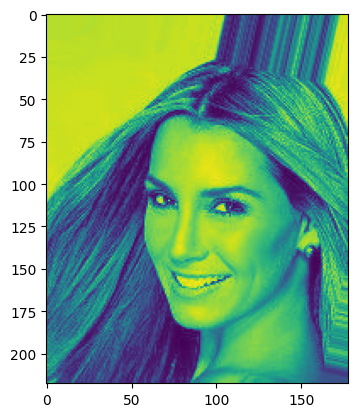

In [15]:
plt.imshow(img1)
plt.show()

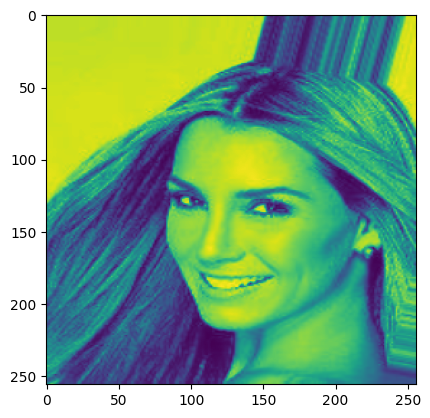

In [49]:
import torchvision.transforms as T
trf = T.Compose([T.Resize((256, 256), antialias=False),
                 T.CenterCrop(224),
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
tf = T.Resize((256, 256), antialias=False)
plt.imshow(tf(img1.unsqueeze(0)).squeeze(0))

In [50]:
img = cl.load_img(gray=False)

In [55]:
inp = trf(torch.stack(img))

In [59]:
out = fcn(inp[:1])['out']
print(out.shape)

torch.Size([1, 21, 224, 224])


In [60]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print(om.shape)
print(np.unique(om))

(224, 224)
[ 0 15]


In [61]:
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

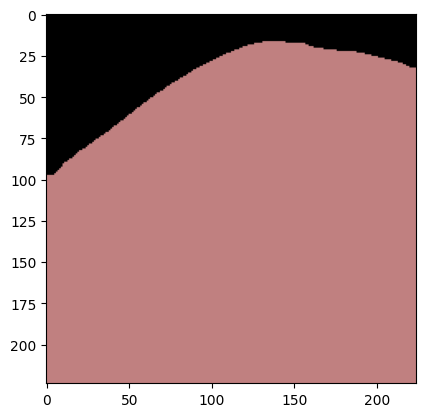

In [62]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [97]:
inp[0].shape

torch.Size([3, 224, 224])

In [121]:
def fcn_check(image_idx):
    out = fcn(inp[image_idx:image_idx + 1])['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)

    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax1.imshow(tf(torch.mean(img[image_idx], dim=0, keepdim=True)).squeeze(0))
    ax2.imshow(rgb) 
    plt.show()

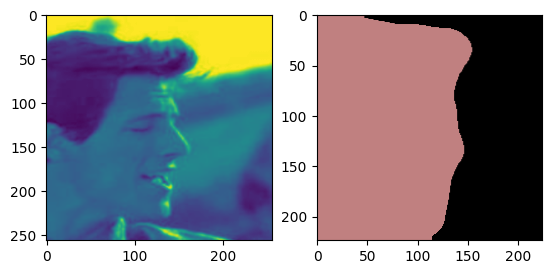

In [122]:
fcn_check(2)

In [109]:
a = torch.randn(3, 218, 178)
print(a)
torch.mean(a, dim=0)

tensor([[[ 6.1707e-01, -1.6764e-01,  1.0981e+00,  ...,  1.3868e+00,
           1.1089e+00,  1.6919e-01],
         [ 2.7505e-01,  2.2537e-01, -2.0621e-01,  ..., -7.3095e-01,
          -7.9995e-01, -1.5776e+00],
         [ 3.4239e-01,  3.4908e-01,  2.6854e-01,  ...,  1.0888e+00,
          -2.5926e-01, -4.4135e-01],
         ...,
         [ 4.3784e-01, -1.2202e+00, -1.5601e+00,  ...,  2.9246e-01,
           6.5079e-02, -6.8041e-01],
         [-1.3341e-01, -4.7916e-01, -2.6985e+00,  ...,  7.0202e-01,
          -1.3071e-01,  1.3260e+00],
         [-1.4378e+00, -1.3131e+00,  5.3855e-01,  ...,  2.0893e-01,
          -1.2182e-01, -1.2069e-01]],

        [[-2.1699e-01,  5.1576e-01, -1.2759e+00,  ..., -1.4163e+00,
          -5.4380e-01, -1.5095e+00],
         [-4.9472e-01, -6.2240e-01,  3.6601e-01,  ..., -3.3046e-02,
          -4.3106e-01, -1.8847e+00],
         [-4.9504e-01,  8.5333e-01,  1.5421e+00,  ...,  1.3916e+00,
           1.9481e+00,  1.1463e+00],
         ...,
         [-6.7804e-01, -2

tensor([[-0.6984,  0.1774, -0.5622,  ..., -0.0904,  0.4328, -1.1425],
        [-0.8436, -0.3521, -0.2851,  ...,  0.6033, -0.5049, -1.4659],
        [ 0.1035,  0.2603,  1.5251,  ...,  1.3330,  1.1152,  0.9481],
        ...,
        [-0.4967,  0.1225, -0.2394,  ..., -0.2558, -0.6046, -0.4007],
        [-0.2669, -0.4037, -0.7821,  ..., -0.6186, -0.6996,  0.0775],
        [-0.5987, -0.3489,  0.5899,  ...,  0.4752, -0.4859, -0.0780]])

In [110]:
img[2]

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.5725, 0.5765, 0.5882,  ..., 0.3569, 0.3608, 0.3608],
         [0.5294, 0.5333, 0.5451,  ..., 0.3686, 0.3686, 0.3686],
         [0.5216, 0.5255, 0.5373,  ..., 0.3686, 0.3725, 0.3686]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.4314, 0.4353, 0.4471,  ..., 0.3490, 0.3608, 0.3608],
         [0.3922, 0.4000, 0.4118,  ..., 0.3608, 0.3686, 0.3686],
         [0.3843, 0.3882, 0.4039,  ..., 0.3608, 0.3647, 0.3686]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

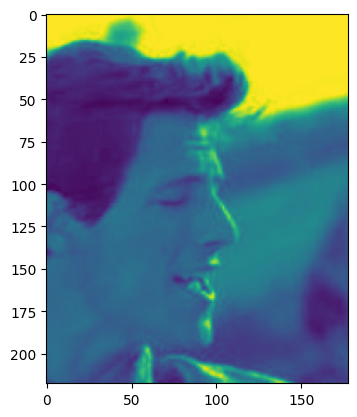

In [112]:
plt.imshow(torch.mean(img[2], dim=0))
plt.show()

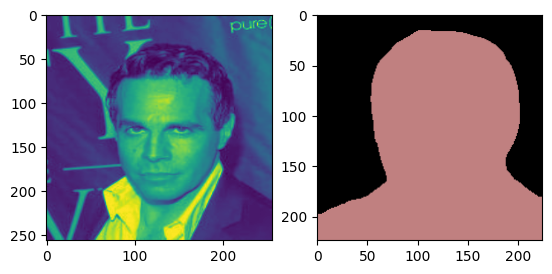

In [123]:
fcn_check(7)